In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 40

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()
year = 2023
today = date.today()
today

datetime.date(2023, 8, 9)

In [23]:
sql = """
SELECT date, C.name AS item, amount, G.name AS kind, factor4 AS type
FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE strftime('%Y', date) = '2023'
ORDER BY date
"""
#sql = sql % year
print(sql)

data = pd.read_sql(sql, conn)
data.tail()


SELECT date, C.name AS item, amount, G.name AS kind, factor4 AS type
FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE strftime('%Y', date) = '2023'
ORDER BY date



,date,item,amount,kind,type
183,2023-08-01,Pets,5840,Pets,8
184,2023-08-03,Pets,8200,Pets,8
185,2023-08-09,Mother,119760,Mother,9
186,2023-08-09,Medicine,8640,Medicine,4
187,2023-08-09,Food,520,Food,1


In [26]:
data['type'] = data['type'].astype(int)

In [55]:
data.query('type == 2')

,date,item,amount,kind,type,month_year,type_description_map,type_description_replace
105,2023-05-12,Personal Care,250,Apparel,2,2023-05,Entertainment,Entertainment


In [24]:
formatted_amt = '{:,.2f}'.format(data.amount.sum())
print(formatted_amt)

765,800.00


In [25]:
data.dtypes

date      object
item      object
amount     int64
kind      object
type      object
dtype: object

In [27]:
data.dtypes

date      object
item      object
amount     int64
kind      object
type       int32
dtype: object

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Total Expenses per Category')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Expenses')

Text(0.5, 1.0, 'Expenses Trend Over Time')

Text(0.5, 0, 'Time (Year-Month)')

Text(0, 0.5, 'Total Expenses')

<AxesSubplot:xlabel='kind', ylabel='amount'>

Text(0.5, 1.0, 'Distribution of Expenses Across Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Expense Amount')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Most Costly Items')

Text(0.5, 0, 'Item')

Text(0, 0.5, 'Total Expenses')

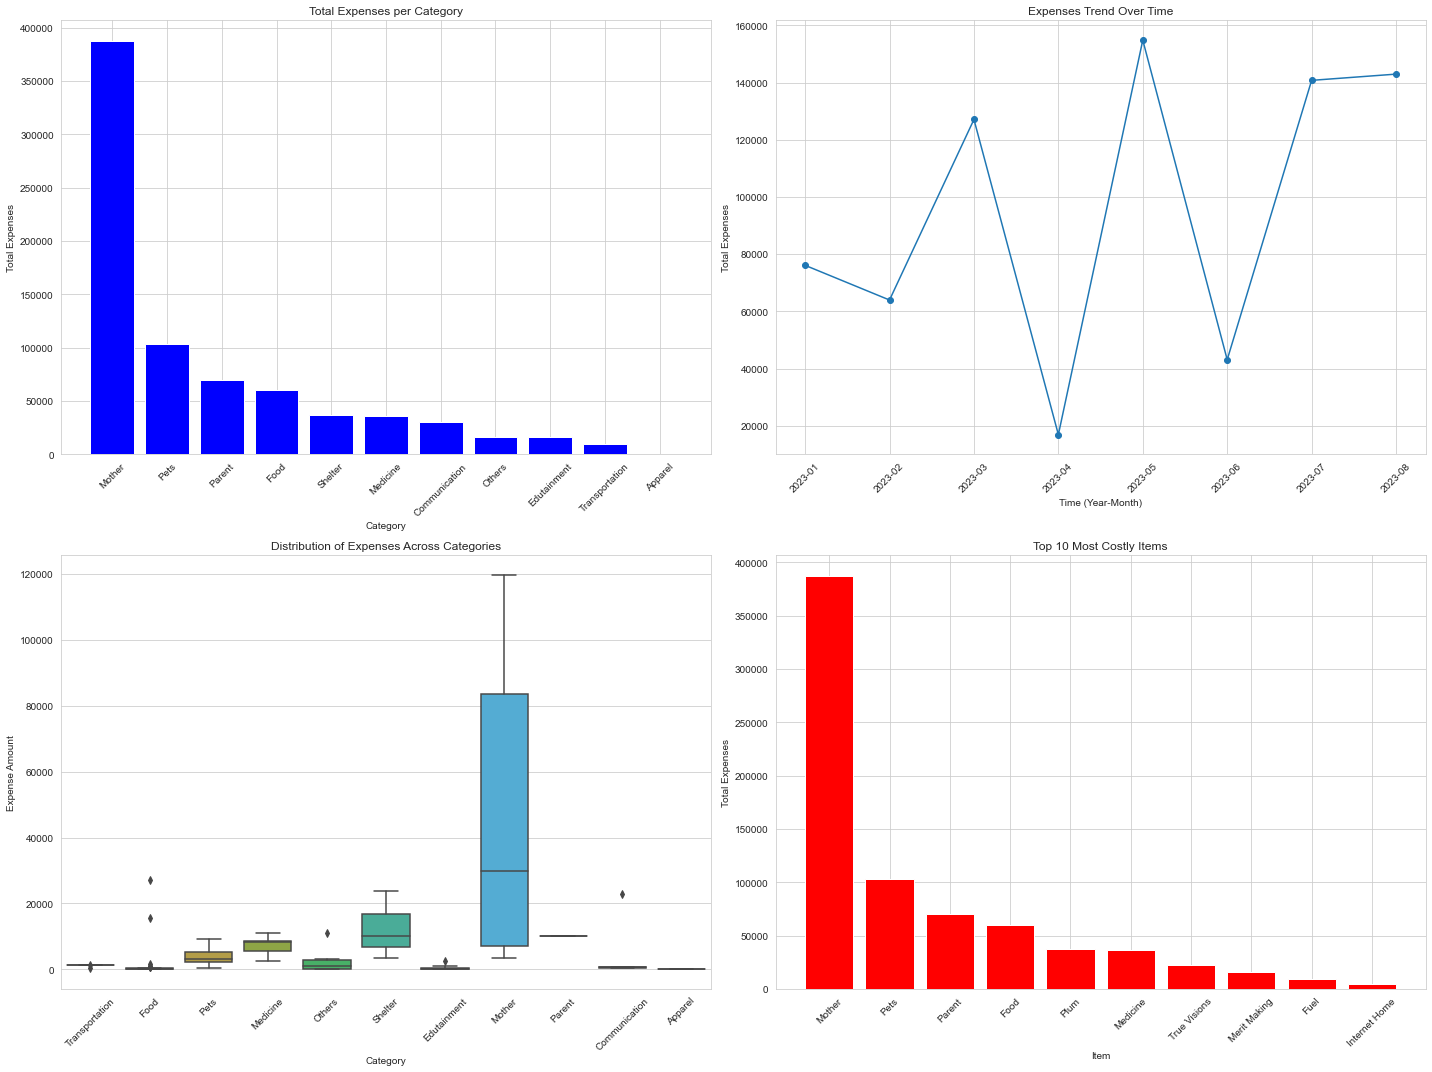

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Set the style of the plots
sns.set_style("whitegrid")

# Create a figure and axes for 4 subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Plot total expenses per category
total_expenses_per_category = data.groupby('kind')['amount'].sum().sort_values(ascending=False)
ax[0, 0].bar(total_expenses_per_category.index, total_expenses_per_category.values, color='b')
ax[0, 0].set_title('Total Expenses per Category')
ax[0, 0].set_xlabel('Category')
ax[0, 0].set_ylabel('Total Expenses')
ax[0, 0].tick_params(axis='x', rotation=45)

# Plot expenses trend over time
data['month_year'] = data['date'].dt.to_period('M')
expenses_trend = data.groupby('month_year')['amount'].sum()
ax[0, 1].plot(expenses_trend.index.astype(str), expenses_trend.values, marker='o', linestyle='-')
ax[0, 1].set_title('Expenses Trend Over Time')
ax[0, 1].set_xlabel('Time (Year-Month)')
ax[0, 1].set_ylabel('Total Expenses')
ax[0, 1].tick_params(axis='x', rotation=45)

# Plot distribution of expenses across different categories
sns.boxplot(x='kind', y='amount', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Expenses Across Categories')
ax[1, 0].set_xlabel('Category')
ax[1, 0].set_ylabel('Expense Amount')
ax[1, 0].tick_params(axis='x', rotation=45)

# Plot most costly items
most_costly_items = data.groupby('item')['amount'].sum().sort_values(ascending=False).head(10)
ax[1, 1].bar(most_costly_items.index, most_costly_items.values, color='r')
ax[1, 1].set_title('Top 10 Most Costly Items')
ax[1, 1].set_xlabel('Item')
ax[1, 1].set_ylabel('Total Expenses')
ax[1, 1].tick_params(axis='x', rotation=45)

# Improve the layout
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Top 10 Most Costly Items')

Text(0.5, 0, 'Total Expenses')

Text(0, 0.5, 'Item')

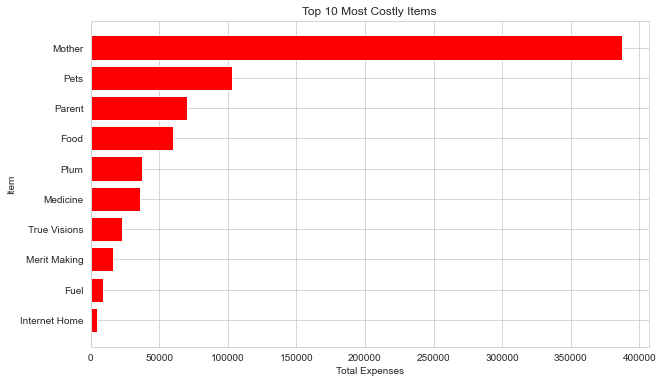

In [29]:
# Plot most costly items as a standalone chart
plt.figure(figsize=(10, 6))
plt.barh(most_costly_items.index, most_costly_items.values, color='r')
plt.title('Top 10 Most Costly Items')
plt.xlabel('Total Expenses')
plt.ylabel('Item')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='kind', ylabel='amount'>

Text(0.5, 1.0, 'Distribution of Expenses Across Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Expense Amount')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Transportation'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Pets'),
  Text(3, 0, 'Medicine'),
  Text(4, 0, 'Others'),
  Text(5, 0, 'Shelter'),
  Text(6, 0, 'Edutainment'),
  Text(7, 0, 'Mother'),
  Text(8, 0, 'Parent'),
  Text(9, 0, 'Communication'),
  Text(10, 0, 'Apparel')])

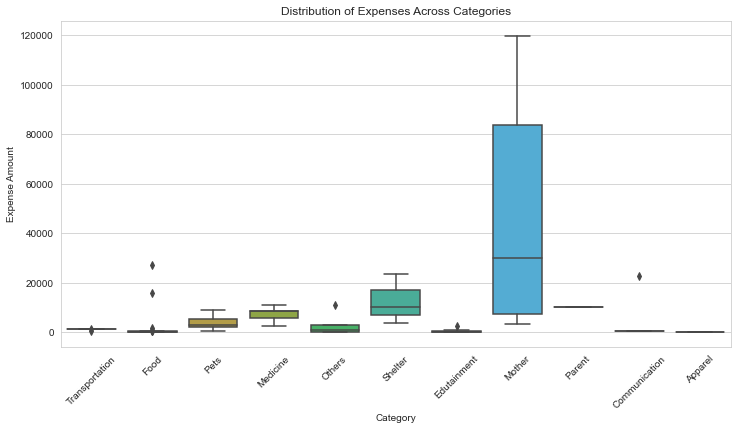

In [30]:
# Create a larger standalone plot for the distribution of expenses across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='kind', y='amount', data=data)
plt.title('Distribution of Expenses Across Categories')
plt.xlabel('Category')
plt.ylabel('Expense Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Expenses Trend Over Time')

Text(0.5, 0, 'Time (Year-Month)')

Text(0, 0.5, 'Total Expenses')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

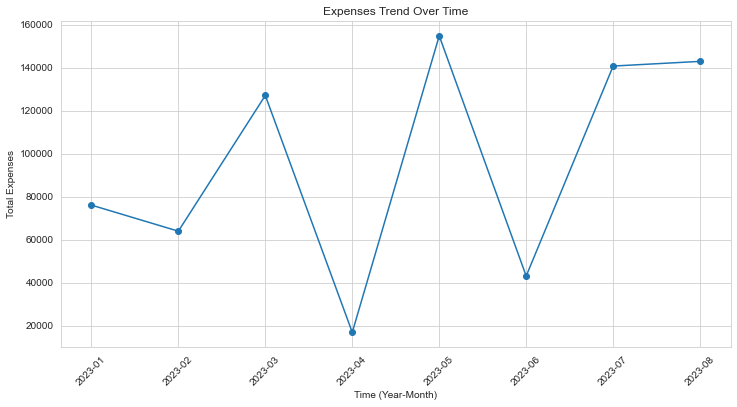

In [31]:
# Create a standalone plot for expenses trend over time
plt.figure(figsize=(12, 6))
plt.plot(expenses_trend.index.astype(str), expenses_trend.values, marker='o', linestyle='-')
plt.title('Expenses Trend Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Figure size 720x432 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Total Expenses per Category')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Total Expenses')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

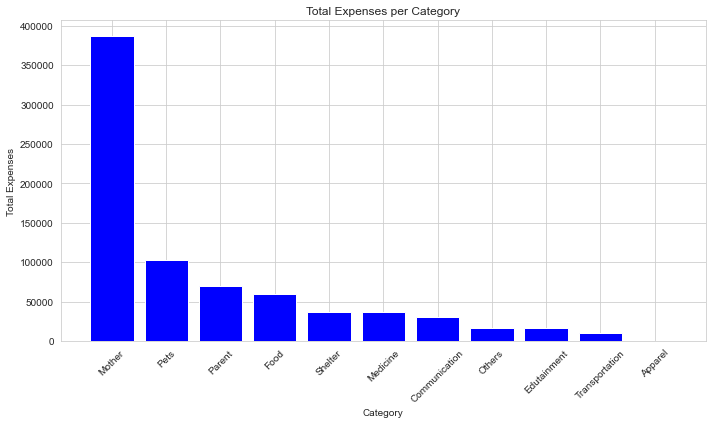

In [32]:
# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot total expenses per category
plt.bar(total_expenses_per_category.index, total_expenses_per_category.values, color='b')
plt.title('Total Expenses per Category')
plt.xlabel('Category')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Total Expenses per Type')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Total Expenses')

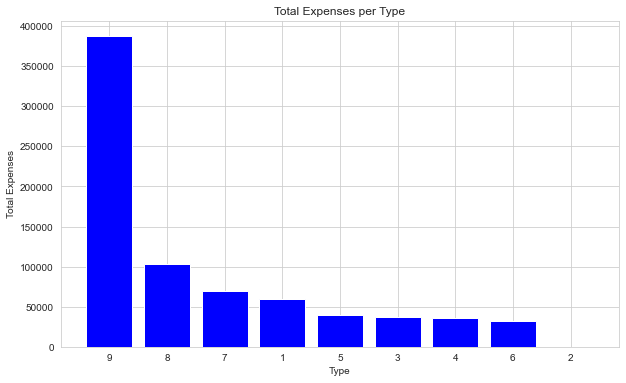

In [33]:
# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Calculate total expenses per type
total_expenses_per_type = data.groupby('type')['amount'].sum().sort_values(ascending=False)

# Generate the bar plot
plt.bar(total_expenses_per_type.index.astype(str), total_expenses_per_type.values, color='b')

# Set the title and labels
plt.title('Total Expenses per Type')
plt.xlabel('Type')
plt.ylabel('Total Expenses')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Total and Average Food Expenses Over Time')

Text(0.5, 0, 'Time (Year-Month)')

Text(0, 0.5, 'Total Amount')

Text(0, 0.5, 'Average Amount')

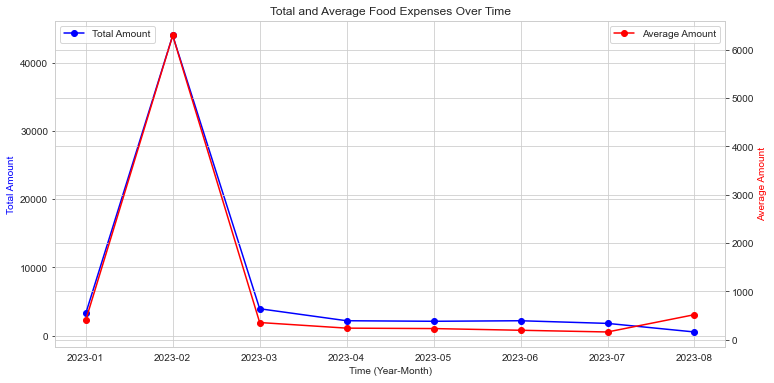

In [34]:
# Filter data for 'Food' items
food_data = data[data['item'] == 'Food']

# Group by month and calculate total and average amounts
food_expenses_by_month = food_data.groupby('month_year').agg({'amount': ['sum', 'mean']}).reset_index()
food_expenses_by_month.columns = ['month_year', 'total_amount', 'average_amount']

# Create a new figure for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total expenses over time
ax1.plot(food_expenses_by_month['month_year'].astype(str), food_expenses_by_month['total_amount'], color='b', marker='o', linestyle='-', label='Total Amount')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(food_expenses_by_month['month_year'].astype(str), food_expenses_by_month['average_amount'], color='r', marker='o', linestyle='-', label='Average Amount')

# Set the title and labels
ax1.set_title('Total and Average Food Expenses Over Time')
ax1.set_xlabel('Time (Year-Month)')
ax1.set_ylabel('Total Amount', color='b')
ax2.set_ylabel('Average Amount', color='r')

# Set the legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Total and Average pets Expenses Over Time')

Text(0.5, 0, 'Time (Year-Month)')

Text(0, 0.5, 'Total Amount')

Text(0, 0.5, 'Average Amount')

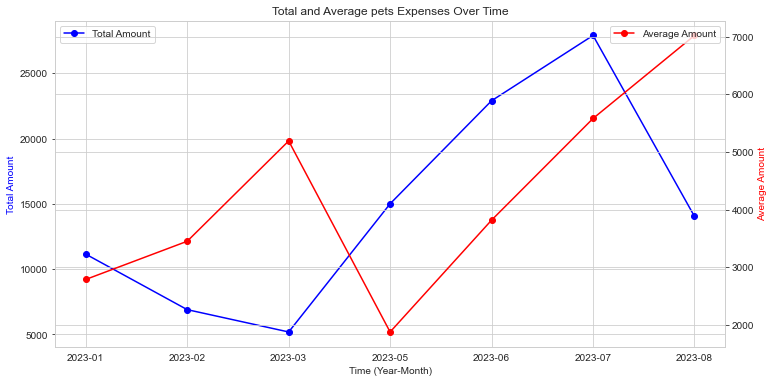

In [35]:
# Filter data for 'pets' items
pets_data = data[data['item'] == 'Pets']

# Group by month and calculate total and average amounts
pets_expenses_by_month = pets_data.groupby('month_year').agg({'amount': ['sum', 'mean']}).reset_index()
pets_expenses_by_month.columns = ['month_year', 'total_amount', 'average_amount']

# Create a new figure for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total expenses over time
ax1.plot(pets_expenses_by_month['month_year'].astype(str), pets_expenses_by_month['total_amount'], color='b', marker='o', linestyle='-', label='Total Amount')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(pets_expenses_by_month['month_year'].astype(str), pets_expenses_by_month['average_amount'], color='r', marker='o', linestyle='-', label='Average Amount')

# Set the title and labels
ax1.set_title('Total and Average pets Expenses Over Time')
ax1.set_xlabel('Time (Year-Month)')
ax1.set_ylabel('Total Amount', color='b')
ax2.set_ylabel('Average Amount', color='r')

# Set the legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In [36]:
pets_expenses_by_month = pets_data.groupby('month_year').agg({'amount': ['sum', 'mean']}).reset_index()
pets_expenses_by_month

month_year amount             
                sum         mean
0    2023-01  11150  2787.500000
1    2023-02   6900  3450.000000
2    2023-03   5190  5190.000000
3    2023-05  15010  1876.250000
4    2023-06  22900  3816.666667
5    2023-07  27900  5580.000000
6    2023-08  14040  7020.000000

In [37]:
pets_data = data[data['item'] == 'Pets']
pets_data.amount.sum()

103090

<Figure size 720x432 with 0 Axes>

TypeError: float() argument must be a string or a number, not 'Period'

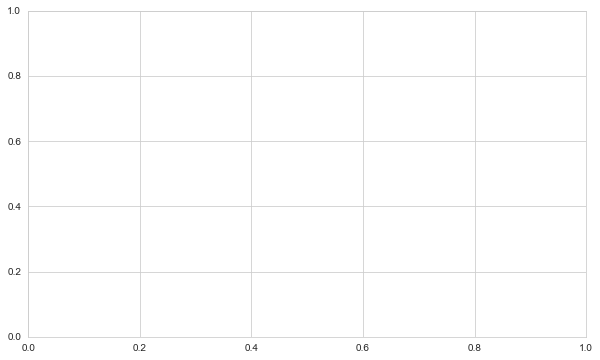

In [38]:
food_expenses = data[data['item'] == 'Food'].groupby('month_year')['amount']
total_food_expenses = food_expenses.sum()
avg_food_expenses = food_expenses.mean()
plt.figure(figsize=(10,6))
plt.plot(total_food_expenses.index, total_food_expenses.values, marker='o', linestyle='-', color='skyblue', label='Total')


TypeError: float() argument must be a string or a number, not 'Period'

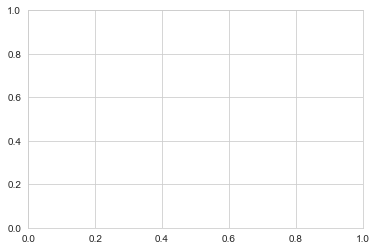

In [39]:

plt.plot(avg_food_expenses.index, avg_food_expenses.values, marker='o', linestyle='-', color='orange', label='Average')
plt.title('Food Expenses Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 720x504 with 0 Axes>

<AxesSubplot:title={'center':'Expense Distribution by Type (Excluding Types 7, 8, 9)'}, ylabel='amount'>

Text(0, 0.5, '')

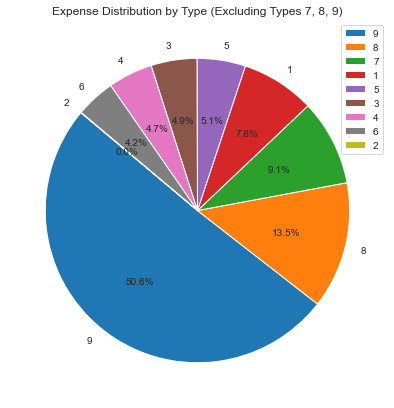

In [40]:
# Filter out the types 7, 8, and 9
filtered_expenses = data[~data['type'].isin(['7','8','9'])]

# Group by type and sum the amounts
expenses_by_type = filtered_expenses.groupby('type').amount.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
expenses_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True, title="Expense Distribution by Type (Excluding Types 7, 8, 9)")
plt.ylabel('')
plt.show()


In [41]:
# Mapping for the type column
type_mapping = {
    1: 'Food',
    2: 'Entertainment',
    3: 'Utilities',
    4: 'Medicine',
    5: 'Communication',
    6: 'Edutainment',
    7: 'Parent',
    8: 'Pets',
    9: 'Mother'
}

# Using map function
data['type_description_map'] = data['type'].map(type_mapping)

# Using replace function
data['type_description_replace'] = data['type'].replace(type_mapping)

# Display the first few rows to verify
data[['type', 'type_description_map', 'type_description_replace']].head()


,type,type_description_map,type_description_replace
0,5,Transportation,Transportation
1,1,Food,Food
2,1,Food,Food
3,1,Food,Food
4,8,Type8,Type8


In [42]:
data.dtypes

date                        datetime64[ns]
item                                object
amount                               int64
kind                                object
type                                 int32
month_year                       period[M]
type_description_map                object
type_description_replace            object
dtype: object

In [43]:
data

,date,item,amount,kind,type,month_year,type_description_map,type_description_replace
0,2023-01-01,Fuel,1200,Transportation,5,2023-01,Transportation,Transportation
1,2023-01-01,Food,120,Food,1,2023-01,Food,Food
2,2023-01-02,Food,1670,Food,1,2023-01,Food,Food
3,2023-01-03,Food,100,Food,1,2023-01,Food,Food
4,2023-01-04,Pets,5670,Pets,8,2023-01,Type8,Type8
...,...,...,...,...,...,...,...,...
183,2023-08-01,Pets,5840,Pets,8,2023-08,Type8,Type8
184,2023-08-03,Pets,8200,Pets,8,2023-08,Type8,Type8
185,2023-08-09,Mother,119760,Mother,9,2023-08,Type9,Type9
186,2023-08-09,Medicine,8640,Medicine,4,2023-08,Rent,Rent


<Figure size 720x504 with 0 Axes>

<AxesSubplot:title={'center':'Expense Distribution by type_description_replace (Excluding type_description_replaces 7, 8, 9)'}, ylabel='amount'>

Text(0, 0.5, '')

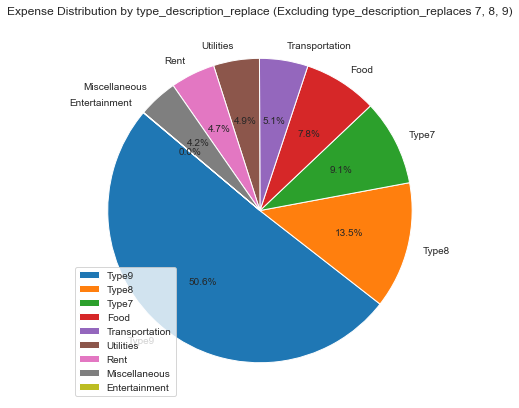

In [48]:
# Filter out the type_description_replaces 7, 8, and 9
filtered_expenses = data[~data['type_description_replace'].isin([7,8,9])]

# Group by type_description_replace and sum the amounts
expenses_by_type_description_replace = filtered_expenses.groupby('type_description_replace').amount.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
expenses_by_type_description_replace.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True, title="Expense Distribution by type_description_replace (Excluding type_description_replaces 7, 8, 9)")
plt.ylabel('')
plt.show()

<Figure size 720x504 with 0 Axes>

<AxesSubplot:title={'center':'Expense Distribution by type_description_replace (Excluding type_description_replaces 7, 8, 9)'}, ylabel='amount'>

Text(0, 0.5, '')

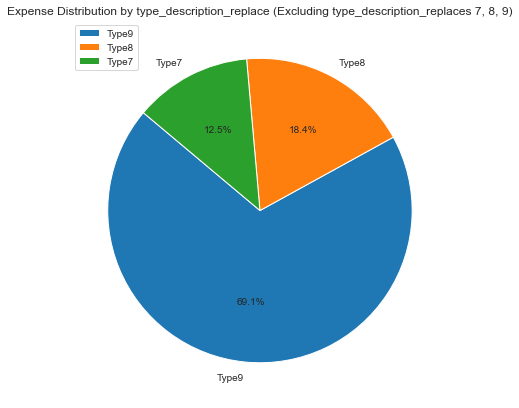

In [47]:
# Filter out the type_description_replaces 7, 8, and 9
filtered_expenses = data[data['type'].isin([7,8,9])]

# Group by type_description_replace and sum the amounts
expenses_by_type_description_replace = filtered_expenses.groupby('type_description_replace').amount.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
expenses_by_type_description_replace.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=True, title="Expense Distribution by type_description_replace (Excluding type_description_replaces 7, 8, 9)")
plt.ylabel('')
plt.show()